Examine crashed run with Live Ocean Bcs. June 29, 2016 restart

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

from salishsea_tools import visualisations, tidetools

%matplotlib inline

In [2]:
f = nc.Dataset('/ocean/nsoontie/MEOPAR/SalishSea/results/live_ocean/live_ocean_test/restart/output.abort.nc')

salt = f.variables['vosaline'][0,:,:,:]

mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

bathy, lons, lats = tidetools.get_bathy_data(grid)
tmask = mesh_mask.variables['tmask'][:]

(420, 0)

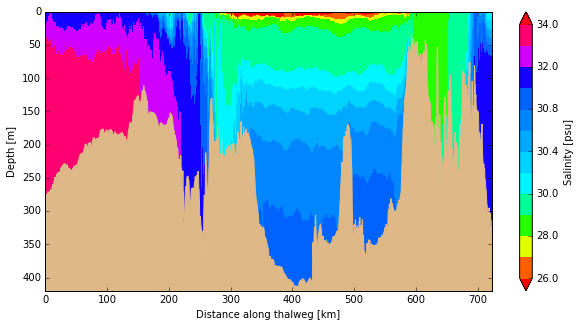

In [3]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
cbar = visualisations.contour_thalweg(ax, salt, bathy, lons, lats, mesh_mask,'gdept',clevels='salinity')
cbar.set_label('Salinity [psu]')
ax.set_ylim([420,0])

[200, 350, 300, 500]

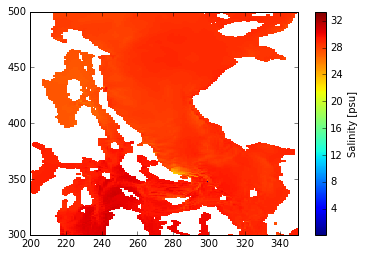

In [10]:
d=15
salP = np.ma.array(salt[d,:,:], mask = 1-tmask[0,d,:,:])
mesh= plt.pcolormesh(salP)
cbar = plt.colorbar(mesh)
cbar.set_label('Salinity [psu]')
plt.axis([200,350,300,500])

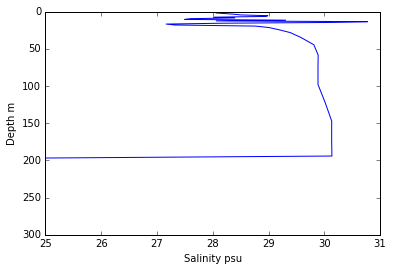

In [14]:
i=300; j=348
depth = mesh_mask.variables['gdept'][0,:,j,i]
plt.plot(salt[:,j,i],depth)
plt.ylim([300,0])
plt.xlim([25,31])
plt.xlabel('Salinity psu')
plt.ylabel('Depth m')

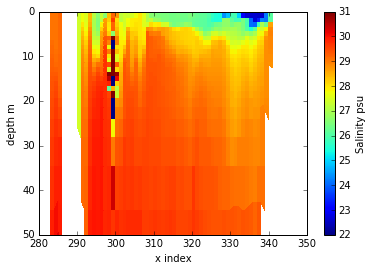

In [15]:
dd = mesh_mask.variables['gdept'][0,:,j,:]
xx,_ = np.meshgrid(np.arange(dd.shape[-1]), dd[:,0])
mesh=plt.pcolormesh(xx,dd,np.ma.array(salt[:,j,:],mask=1-tmask[0,:,j,:]),vmin=22,vmax=31)
plt.ylim([50,0])
plt.xlim([280,350])
cbar=plt.colorbar(mesh)
cbar.set_label('Salinity psu')
plt.ylabel('depth m')
plt.xlabel('x index')

Not sure why it crasehd. Salinity is misbehaved in the Boundary Pass region. Why does changing the boundary conditions at JDF cause the run to fail? 